# Landsile Susceptibility Assessment Using Machine Learning Technique (Combination Model of Logistic Regression-Frequency Ratio)

## Case Study in Pacet District, Mojokerto Regency, East Java Province, Indonesia
    
    

## Part 01 - Preparing Parameter Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from osgeo import gdal, osr
import geopandas as gpd
import matplotlib.gridspec as gridspec
import rasterio as rs
from rasterio import plot

In [10]:
# Calling The Data Using GDAL
Elevation = gdal.Open(r'Parameter Data/Elevation.tif')
Slope = gdal.Open(r'Parameter Data/Slope.tif')
Aspect = gdal.Open(r'Parameter Data/Aspect.tif')
TWI = gdal.Open(r'Parameter Data/TWI.tif')
TPI = gdal.Open(r'Parameter Data/TPI.tif')
SPI = gdal.Open(r'Parameter Data/SPI.tif')
PrC = gdal.Open(r'Parameter Data/PrC.tif')
DtR = gdal.Open(r'Parameter Data/DtR.tif')
DtD = gdal.Open(r'Parameter Data/DtD.tif')
Rf = gdal.Open(r'Parameter Data/Rainfall.tif')
Gly = gdal.Open(r'Parameter Data/Geology.tif')
LU = gdal.Open(r'Parameter Data/LU.tif')

# Change Raster into Array
ArrElevation = Elevation.GetRasterBand(1).ReadAsArray()
ArrSlope = Slope.GetRasterBand(1).ReadAsArray()
ArrAspect = Aspect.GetRasterBand(1).ReadAsArray()
ArrPrC = PrC.GetRasterBand(1).ReadAsArray()
ArrSPI = SPI.GetRasterBand(1).ReadAsArray()
ArrTPI = TPI.GetRasterBand(1).ReadAsArray()
ArrTWI = TWI.GetRasterBand(1).ReadAsArray()
ArrDtR = DtR.GetRasterBand(1).ReadAsArray()
ArrDtD = DtD.GetRasterBand(1).ReadAsArray()
ArrGly = Gly.GetRasterBand(1).ReadAsArray()
ArrRf = Rf.GetRasterBand(1).ReadAsArray()
ArrLU = LU.GetRasterBand(1).ReadAsArray()

### 1. Elevation

In [11]:
!gdalinfo -stats Elevation.tif

ERROR 4: Elevation.tif: No such file or directory
gdalinfo failed - unable to open 'Elevation.tif'.


In [12]:
pdElevation = pd.DataFrame(ArrElevation)
pdElevation

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [15]:
pdElevation01 = pdElevation.replace(-9999, np.nan)
pdElevation01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


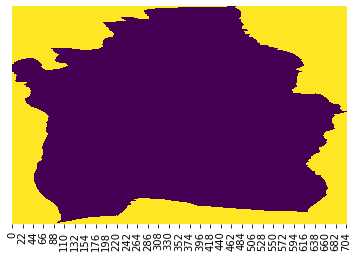

In [16]:
sns.heatmap(pdElevation01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# Count Non-Nulls Value = Total Pixcel in Entire Map
N1 = pdElevation01.notnull().sum().sum()
N1

634629

### 2. Slope

In [18]:
!gdalinfo -stats Slope.tif

ERROR 4: Slope.tif: No such file or directory
gdalinfo failed - unable to open 'Slope.tif'.


In [19]:
pdSlope = pd.DataFrame(ArrSlope)
pdSlope

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [20]:
pdSlope01 = pdSlope.replace(-9999, np.nan)
pdSlope01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


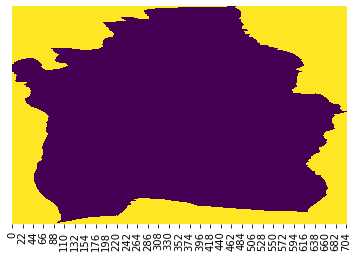

In [21]:
sns.heatmap(pdSlope01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
N2 = pdSlope01.notnull().sum().sum()
N2

634629

### 3. Aspect

In [23]:
!gdalinfo -stats Aspect.tif

ERROR 4: Aspect.tif: No such file or directory
gdalinfo failed - unable to open 'Aspect.tif'.


In [24]:
pdAspect = pd.DataFrame(ArrAspect)
pdAspect

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [25]:
pdAspect01 = pdAspect.replace(-9999, np.nan)
pdAspect01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#pdAspect02 = pdAspect01.replace(361-393.247, 0)
#pdAspect02

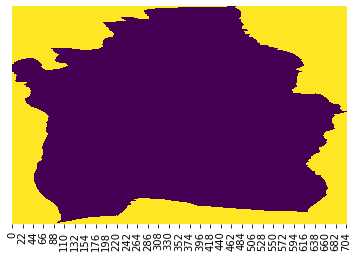

In [27]:
sns.heatmap(pdAspect01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
N3 = pdAspect01.notnull().sum().sum()
N3

634629

### 4. Topographic Wetness Index

In [29]:
!gdalinfo -stats TWI.tif

ERROR 4: TWI.tif: No such file or directory
gdalinfo failed - unable to open 'TWI.tif'.


In [30]:
pdTWI = pd.DataFrame(ArrTWI)
pdTWI

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [31]:
pdTWI01 = pdTWI.replace(-9999, np.nan)
pdTWI01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


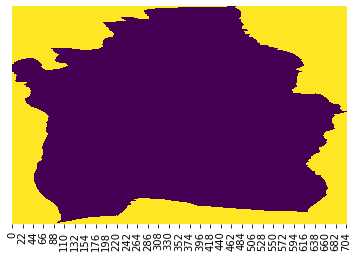

In [32]:
sns.heatmap(pdTWI01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
N4 = pdTWI01.notnull().sum().sum()
N4

634629

### 5.Topographic Position Index

In [34]:
!gdalinfo -stats TPI.tif

ERROR 4: TPI.tif: No such file or directory
gdalinfo failed - unable to open 'TPI.tif'.


In [35]:
pdTPI = pd.DataFrame(ArrTPI)
pdTPI

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [36]:
pdTPI01 = pdTPI.replace(-9999, np.nan)
pdTPI01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


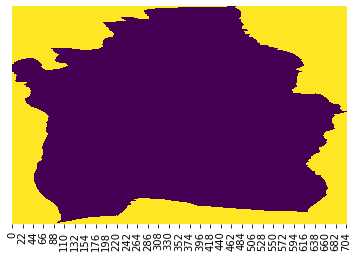

In [37]:
sns.heatmap(pdTPI01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
N5 = pdTPI01.notnull().sum().sum()
N5

634629

### 6. Stream Power Index

In [39]:
!gdalinfo -stats SPI.tif

ERROR 4: SPI.tif: No such file or directory
gdalinfo failed - unable to open 'SPI.tif'.


In [40]:
pdSPI = pd.DataFrame(ArrSPI)
pdSPI

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [41]:
pdSPI01 = pdSPI.replace(-9999, np.nan)
pdSPI01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


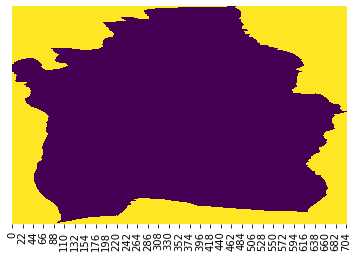

In [42]:
sns.heatmap(pdSPI01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
N6 = pdSPI01.notnull().sum().sum()
N6

634629

### 7. Profile Curvature

In [44]:
!gdalinfo -stats PrC.tif

ERROR 4: PrC.tif: No such file or directory
gdalinfo failed - unable to open 'PrC.tif'.


In [45]:
pdPrC = pd.DataFrame(ArrPrC)
pdPrC

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [46]:
pdPrC01 = pdPrC.replace(-9999, np.nan)
pdPrC01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


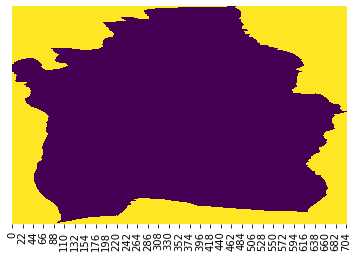

In [47]:
sns.heatmap(pdPrC01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
N7 = pdPrC01.notnull().sum().sum()
N7

634629

### 8. Distance to Road

In [49]:
!gdalinfo -stats DtR.tif

ERROR 4: DtR.tif: No such file or directory
gdalinfo failed - unable to open 'DtR.tif'.


In [50]:
pdDtR = pd.DataFrame(ArrDtR)
pdDtR

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1459,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1460,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1461,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [51]:
pdDtR01 = pdDtR.replace(-9999, np.nan)
pdDtR01

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


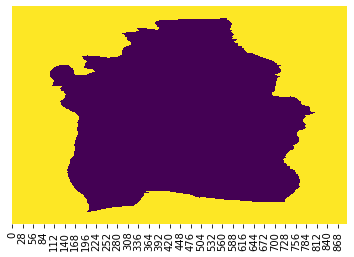

In [52]:
sns.heatmap(pdDtR01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
N8 = pdDtR01.notnull().sum().sum()
N8

634629

### 9. Distance to Drainage

In [54]:
!gdalinfo -stats DtD.tif

ERROR 4: DtD.tif: No such file or directory
gdalinfo failed - unable to open 'DtD.tif'.


In [55]:
pdDtD = pd.DataFrame(ArrDtD)
pdDtD

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1459,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1460,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1461,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [56]:
pdDtD01 = pdDtD.replace(-9999, np.nan)
pdDtD01

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


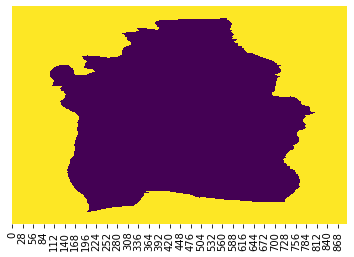

In [57]:
sns.heatmap(pdDtD01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
N9 = pdDtD01.notnull().sum().sum()
N9

634629

### 10. Rainfall

In [59]:
!gdalinfo -stats Rainfall.tif

ERROR 4: Rainfall.tif: No such file or directory
gdalinfo failed - unable to open 'Rainfall.tif'.


In [60]:
pdRf = pd.DataFrame(ArrRf)
pdRf

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1459,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1460,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1461,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [61]:
pdRf01 = pdRf.replace(-9999.0, np.nan)
pdRf01

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


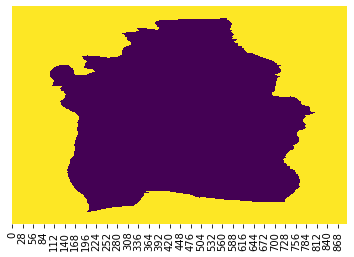

In [62]:
sns.heatmap(pdRf01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
N10 = pdRf01.notnull().sum().sum()
N10

634629

### 11. Soil

In [64]:
!gdalinfo -stats Soil.tif

ERROR 4: Soil.tif: No such file or directory
gdalinfo failed - unable to open 'Soil.tif'.


In [66]:
pdGly = pd.DataFrame(ArrGly)
pdGly

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [73]:
pdGly01 = pdGly.replace(-9999, np.nan)
pdGly01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


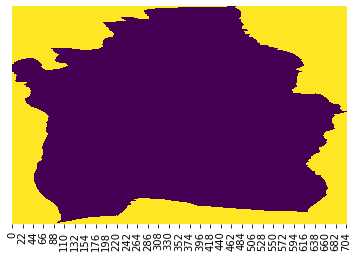

In [74]:
sns.heatmap(pdGly01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
N11 = pdGly01.notnull().sum().sum()
N11

634629

### 12. Land Use

In [76]:
!gdalinfo -stats LU.tif

ERROR 4: LU.tif: No such file or directory
gdalinfo failed - unable to open 'LU.tif'.


In [77]:
pdLU = pd.DataFrame(ArrLU)
pdLU

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [78]:
pdLU01 = pdLU.replace(-9999, np.nan)
pdLU01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


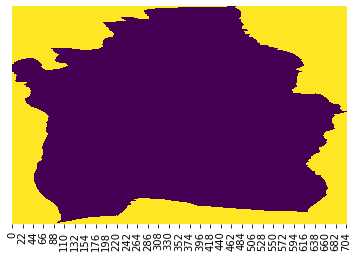

In [79]:
sns.heatmap(pdLU01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
N12 = pdLU01.notnull().sum().sum()
N12

634629

In [82]:
# Checking All Parameters Data Values

Checking = pd.DataFrame({'Parameter': ['Elevation','Slope', 'Aspect', 'Topographic Wetness Index',
                                       'Topographic Position Index', 'Slope Power Index', 'Profile Curvature',
                                       'Distance to Road', 'Disrtance to Drainage', 'Rainfall', 'Soil', 'Land Use'],
                         'Pixcel Value': [N1, N2, N3, N4, N5, N6,
                                 N7,N8,N9,N10,N11,N12],
                        'T/F': [N1==634629, N2==634629, N3==634629, N4==634629, N5==634629, N6==634629,
                                 N7==634629,N8==634629,N9==634629,N10==634629,N11==634629,N12==634629],
                        'Deviation': [N1-634629, N2-634629, N3-634629, N4-634629, N5-634629, N6-634629,
                                 N7-634629,N8-634629,N9-634629,N10-634629,N11-634629,N12-634629]},
                         index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
Checking

,Parameter,Pixcel Value,T/F,Deviation
1,Elevation,634629,True,0
2,Slope,634629,True,0
3,Aspect,634629,True,0
4,Topographic Wetness Index,634629,True,0
5,Topographic Position Index,634629,True,0
6,Slope Power Index,634629,True,0
7,Profile Curvature,634629,True,0
8,Distance to Road,634629,True,0
9,Disrtance to Drainage,634629,True,0
10,Rainfall,634629,True,0


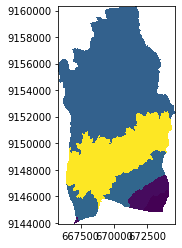

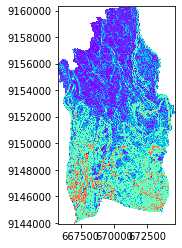

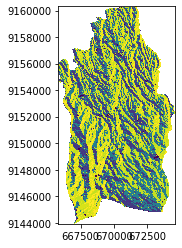

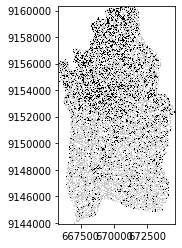

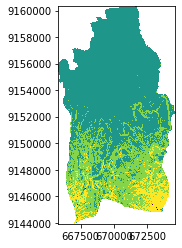

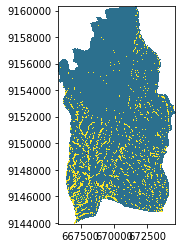

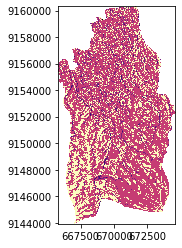

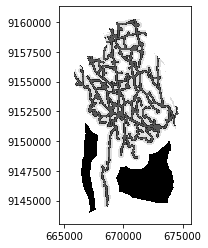

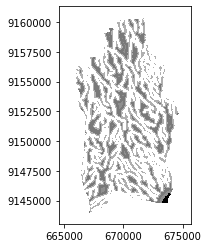

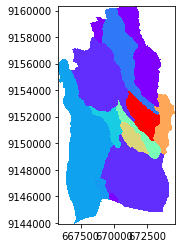

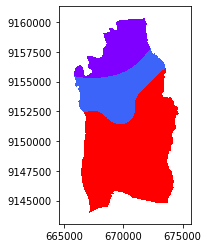

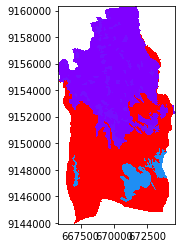

In [191]:
# Displaying Parameter Using Rasterio

rsElevation = rs.open(r'Parameter Data/Elevation.tif')
rsSlope = rs.open(r'Parameter Data/Slope.tif')
rsAspect = rs.open(r'Parameter Data/Aspect.tif')
rsTWI = rs.open(r'Parameter Data/TWI.tif')
rsTPI = rs.open(r'Parameter Data/TPI.tif')
rsSPI = rs.open(r'Parameter Data/SPI.tif')
rsPrC = rs.open(r'Parameter Data/PrC.tif')
rsDtR = rs.open(r'Parameter Data/DtR.tif')
rsDtD = rs.open(r'Parameter Data/DtD.tif')
rsRf = rs.open(r'Parameter Data/Rainfall.tif')
rsGly = rs.open(r'Parameter Data/Geology.tif')
rsLU = rs.open(r'Parameter Data/LU.tif')

fig, ax = plt.subplots()

ax1 = plot.show(rsElevation,)
ax2 = plot.show(rsSlope, cmap='rainbow')
ax3 = plot.show(rsAspect)
ax4 = plot.show(rsPrC, cmap='gray')
ax5 = plot.show(rsSPI)
ax6 = plot.show(rsTPI)
ax7 = plot.show(rsTWI, cmap='magma')
ax8 = plot.show(rsDtR, cmap='gray')
ax9 = plot.show(rsDtD, cmap='gray')
ax10 = plot.show(rsGly, cmap='rainbow')
ax11 = plot.show(rsRf, cmap='rainbow')
ax12 = plot.show(rsLU, cmap='rainbow')

fig.tight_layout()

## Part 02 - Normalized Factor's Value Using Frequency Ratio

### Lvci : Number of Grid Cells with Landslide for Each class

In [95]:
Dataset = pd.read_excel(r'Lvci.xlsx')
Dataset

,Sumber,L,TWI,TPI,SPI,Slope,Rainfall,PrC,LU,Geology,Elevation,DtR,DtD,Aspect
0,Citra Google Earth,1,2,4,2,4,4,3,2,7,4,4,1,9
1,Citra Google Earth,1,2,4,2,5,4,3,2,7,4,4,1,8
2,Citra Google Earth,1,4,3,2,3,4,2,2,7,4,4,1,9
3,Citra Google Earth,1,3,3,2,4,4,1,2,7,3,4,1,9
4,BPBD Kab. Mojokerto,1,3,3,2,4,3,1,4,3,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Citra Google Earth,1,3,3,4,5,4,3,3,4,6,5,1,9
379,Citra Google Earth,1,3,3,4,5,4,1,2,4,6,5,2,9
380,Citra Google Earth,1,3,3,2,5,4,1,2,11,2,2,1,3
381,Citra Google Earth,1,2,3,2,5,4,2,2,7,2,3,1,8


In [96]:
# 01 Rainfall
print('Total Pixel of Rainfall:', Dataset["Rainfall"].count())
a = pd.value_counts(Dataset["Rainfall"])
a

Total Pixel of Rainfall: 383


4    302
3     81
Name: Rainfall, dtype: int64

In [97]:
# 02 Aspect
print('Total Pixel of Aspect:', Dataset["Aspect"].count())
a = pd.value_counts(Dataset["Aspect"])
a

Total Pixel of Aspect: 383


2    126
3     89
9     72
4     54
8     19
5     16
7      6
6      1
Name: Aspect, dtype: int64

In [98]:
# 03 TPI
print('Total Pixel of TPI:', Dataset["TPI"].count())
a = pd.value_counts(Dataset["TPI"])
a

Total Pixel of TPI: 383


3    207
4    131
2     27
5     17
6      1
Name: TPI, dtype: int64

In [99]:
# 04 SPI
print('Total Pixel of SPI:', Dataset["SPI"].count())
a = pd.value_counts(Dataset["SPI"])
a

Total Pixel of SPI: 383


2    223
3    123
4     25
1     12
Name: SPI, dtype: int64

In [100]:
# 05 TWI
print('Total Pixel of TWI:', Dataset["TWI"].count())
a = pd.value_counts(Dataset["TWI"])
a

Total Pixel of TWI: 383


3    202
2    170
4     10
5      1
Name: TWI, dtype: int64

In [101]:
# 06 Geology
print('Total Pixel of Geology:', Dataset["Geology"].count())
a = pd.value_counts(Dataset["Geology"])
a

Total Pixel of Geology: 383


3     104
8      76
7      57
4      40
6      34
11     26
5      26
9      16
1       4
Name: Geology, dtype: int64

In [102]:
# 07 Distance to Road
print('Total Pixel of Distance to Road:', Dataset["DtR"].count())
a = pd.value_counts(Dataset["DtR"])
a

Total Pixel of Distance to Road: 383


4    138
3    121
5     52
1     44
2     28
Name: DtR, dtype: int64

In [103]:
# 08 Distance to Drainage
print('Total Pixel of Distance to Drainage:', Dataset["DtD"].count())
a = pd.value_counts(Dataset["DtD"])
a

Total Pixel of Distance to Drainage: 383


1    249
2     98
3     30
5      4
4      2
Name: DtD, dtype: int64

In [104]:
# 09 Slope
print('Total Pixel of Slope:', Dataset["Slope"].count())
a = pd.value_counts(Dataset["Slope"])
a

Total Pixel of Slope: 383


5    214
4     90
6     63
3     15
7      1
Name: Slope, dtype: int64

In [105]:
# 10 Elevation
print('Total Pixel of Elevation:', Dataset["Elevation"].count())
a = pd.value_counts(Dataset["Elevation"])
a

Total Pixel of Elevation: 383


3    138
2    105
4     95
6     25
5     20
Name: Elevation, dtype: int64

In [106]:
# 11 Profile Curvature
print('Total Pixel Profile of Curvature:', Dataset["PrC"].count())
a = pd.value_counts(Dataset["PrC"])
a

Total Pixel Profile of Curvature: 383


3    195
1    165
2     23
Name: PrC, dtype: int64

In [107]:
# 12 Land Use
print('Total Pixel of Profile Land Use:', Dataset["LU"].count())
a = pd.value_counts(Dataset["LU"])
a

Total Pixel of Profile Land Use: 383


2    282
4     67
3     29
1      4
5      1
Name: LU, dtype: int64

### Ls : Total Number of Grid Cells with Landsilde

In [109]:
Dataset.count()

Sumber       383
L            383
TWI          383
TPI          383
SPI          383
Slope        383
Rainfall     383
PrC          383
LU           383
Geology      383
Elevation    383
DtR          383
DtD          383
Aspect       383
dtype: int64

### Aci : Pixel Number of Each Class Parameter Landslide

In [111]:
from simpledbf import Dbf5

In [114]:
Aspect = Dbf5(r'Dbf/Aspect.dbf')
DtD = Dbf5(r'Dbf/DtD.dbf')
DtR = Dbf5(r'Dbf/DtR.dbf')
Elevation = Dbf5(r'Dbf/Elevation.dbf')
Geology = Dbf5(r'Dbf/Geology.dbf')
LU = Dbf5(r'Dbf/LU.dbf')
PrC = Dbf5(r'Dbf/PrC.dbf')
Rainfall = Dbf5(r'Dbf/Rainfall.dbf')
Slope = Dbf5(r'Dbf/Slope.dbf')
SPI = Dbf5(r'Dbf/SPI.dbf')
TPI = Dbf5(r'Dbf/TPI.dbf')
TWI = Dbf5(r'Dbf/TWI.dbf')


Aspect = Aspect.to_dataframe()
DtD = DtD.to_dataframe()
DtR = DtR.to_dataframe()
Elevation = Elevation.to_dataframe()
Geology = Geology.to_dataframe()
LU = LU.to_dataframe()
Slope = Slope.to_dataframe()
SPI = SPI.to_dataframe()
TPI = TPI.to_dataframe()
TWI = TWI.to_dataframe()
Rainfall = Rainfall.to_dataframe()
PrC = PrC.to_dataframe()

In [115]:
# 01 Rainfall
print('Total Pixel of Rainfall:', Rainfall["Rainfall"].count())
a = pd.value_counts(Rainfall["Rainfall"])
a

Total Pixel of Rainfall: 634629


4.0    320443
3.0    197164
2.0     66077
1.0     50945
Name: Rainfall, dtype: int64

In [116]:
# 02 Aspect
print('Total Pixel of Aspect:', Aspect["Aspect"].count())
a = pd.value_counts(Aspect["Aspect"])
a

Total Pixel of Aspect: 634629


9.0    172034
2.0    144026
8.0    105927
3.0    100420
4.0     55717
7.0     34049
5.0     15729
6.0      6256
1.0       471
Name: Aspect, dtype: int64

In [117]:
# 03 TPI
print('Total Pixel of TPI:', TPI["TPI"].count())
a = pd.value_counts(TPI["TPI"])
a

Total Pixel of TPI: 634629


3.0    424473
4.0    165909
2.0     31296
5.0      9744
1.0      2281
6.0       926
Name: TPI, dtype: int64

In [118]:
# 04 SPI
print('Total Pixel of SPI:', SPI["SPI"].count())
a = pd.value_counts(SPI["SPI"])
a

Total Pixel of SPI: 634629


1.0    248978
2.0    235112
3.0    118412
4.0     32127
Name: SPI, dtype: int64

In [119]:
# 05 TWI
print('Total Pixel of TWI:', TWI["TWI"].count())
a = pd.value_counts(TWI["TWI"])
a

Total Pixel of TWI: 634629


3.0    412158
2.0    173139
4.0     44089
5.0      5226
1.0        17
Name: TWI, dtype: int64

In [172]:
# 06 Geology
print('Total Pixel of Geology:', Geology["VALUE"].count())
a = pd.value_counts(Geology["VALUE"])
a

Total Pixel of Geology: 634629


4.0     224506
3.0     158469
11.0     62796
13.0     32412
8.0      28369
7.0      27301
9.0      18678
10.0     18278
5.0      17395
6.0      15646
12.0     13871
14.0      8063
1.0       6777
2.0       2068
Name: VALUE, dtype: int64

In [ ]:
# 07 Distance to Road
print('Total Pixel of Distance to Road:', DtR["DtR"].count())
a = pd.value_counts(DtR["DtR"])
a

In [ ]:
# 08 Distance to Drainage
print('Total Pixel of Distance to Drainage:', DtD["DtD"].count())
a = pd.value_counts(DtD["DtD"])
a

In [ ]:
# 09 Slope
print('Total Pixel of Slope:', Slope["Slope"].count())
a = pd.value_counts(Slope["Slope"])
a

In [ ]:
# 10 Elevation
print('Total Pixel of Elevation:', Elevasi["Elevation"].count())
a = pd.value_counts(Elevasi["Elevation"])
a

In [ ]:
# 11 Profile Curvature
print('Total Pixel of Profile Curvature:', PrC["PrC"].count())
a = pd.value_counts(PrC["PrC"])
a

In [ ]:
# 12 Land Use
print('Total Pixel of Land Use:', LU["LU"].count())
a = pd.value_counts(LU["LU"])
a

### As : Number of Grid Cells Covering the Whole Area

In [107]:
print("Number of Grid Cells Covering The Whole Area:", pdElevation01.notnull().sum().sum())

Number of Grid Cells Covering The Whole Area: 634629


## Part 03 - Training Dataset and Testing Dataset Preparation

In [126]:
Dataset = pd.read_excel(r'Training Dataset & Testing Dataset.xlsx')
Dataset

,Sumber,L,TWI,TPI,SPI,Slope,Rainfall,PrC,Land Use,Geology,Elevation,DtR,DtD,Aspect
0,Citra Google Earth,1,1.00,0.45,0.91,0.29,1.00,1.00,0.85,0.78,0.89,1.00,1.00,0.41
1,Citra Google Earth,1,1.00,0.45,0.91,0.55,1.00,1.00,0.85,0.78,0.89,1.00,1.00,0.18
2,Citra Google Earth,1,0.23,0.28,0.91,0.05,1.00,0.00,0.85,0.78,0.89,1.00,1.00,0.41
3,Citra Google Earth,1,0.50,0.28,0.91,0.29,1.00,0.74,0.85,0.78,1.00,1.00,1.00,0.41
4,BPBD Kab. Mojokerto,1,0.50,0.28,0.91,0.29,0.44,0.74,0.17,0.24,0.45,0.84,1.00,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,NaN,0,0.50,0.28,0.00,0.00,1.00,0.00,0.85,0.07,0.89,0.10,1.00,0.16
762,NaN,0,0.50,0.28,0.00,0.05,0.44,0.00,0.00,0.24,0.00,0.10,1.00,0.18
763,NaN,0,0.50,0.28,0.00,0.00,0.44,0.74,0.00,0.07,0.45,0.00,0.67,0.17
764,NaN,0,0.50,0.28,0.00,0.00,0.44,0.74,0.00,0.07,0.45,0.10,1.00,0.18


In [127]:
Dataset.count()

Sumber       743
L            766
TWI          766
TPI          766
SPI          766
Slope        766
Rainfall     766
PrC          766
Land Use     766
Geology      766
Elevation    766
DtR          766
DtD          766
Aspect       766
dtype: int64

In [128]:
#Split the dataset

from sklearn.model_selection import train_test_split

In [129]:
Dataset.head(2)

,Sumber,L,TWI,TPI,SPI,Slope,Rainfall,PrC,Land Use,Geology,Elevation,DtR,DtD,Aspect
0,Citra Google Earth,1,1.0,0.45,0.91,0.29,1.0,1.0,0.85,0.78,0.89,1.0,1.0,0.41
1,Citra Google Earth,1,1.0,0.45,0.91,0.55,1.0,1.0,0.85,0.78,0.89,1.0,1.0,0.18


In [130]:
X = Dataset[['TWI','TPI','SPI','Geology','Slope','Land Use','Rainfall','PrC','Elevation','DtR','DtD','Aspect']]
y = Dataset['L']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [131]:
X_train.head()

,TWI,TPI,SPI,Geology,Slope,Land Use,Rainfall,PrC,Elevation,DtR,DtD,Aspect
626,0.5,0.28,0.00,0.07,0.00,0.17,0.44,1.00,0.45,0.00,0.67,0.17
69,1.0,0.28,1.00,0.15,1.00,0.85,1.00,0.74,1.00,1.00,1.00,0.86
665,1.0,0.45,0.00,0.00,0.00,0.17,0.00,1.00,0.00,0.84,0.67,0.87
492,0.5,0.28,0.00,0.00,0.05,0.00,0.00,1.00,0.00,0.00,0.43,0.41
97,1.0,1.00,0.91,1.00,0.29,0.85,1.00,1.00,1.00,0.84,0.67,0.87


In [132]:
X_test

,TWI,TPI,SPI,Geology,Slope,Land Use,Rainfall,PrC,Elevation,DtR,DtD,Aspect
143,1.0,0.45,0.91,0.15,0.55,0.85,0.44,1.00,0.45,0.84,1.00,0.95
604,0.5,0.28,0.00,0.00,0.05,0.00,0.00,1.00,0.00,0.10,0.43,0.41
194,0.5,0.45,0.91,1.00,0.29,0.85,1.00,1.00,1.00,0.84,1.00,0.87
196,1.0,1.00,0.91,1.00,0.55,0.17,1.00,1.00,1.00,0.84,0.67,0.87
392,0.5,0.28,0.00,0.00,0.29,0.17,0.00,1.00,0.00,0.84,0.67,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.5,0.28,0.00,0.00,0.05,0.17,0.00,0.74,0.00,1.00,0.67,0.41
407,0.5,0.28,0.00,0.07,0.00,0.17,0.00,1.00,0.00,0.84,1.00,0.16
303,1.0,0.45,1.00,0.56,0.55,0.85,1.00,0.74,0.89,1.00,0.67,0.87
358,1.0,0.45,1.00,0.07,0.55,1.00,1.00,1.00,0.23,0.09,0.00,0.18


In [133]:
y_test

143    1
604    0
194    1
196    1
392    0
      ..
497    0
407    0
303    1
358    1
202    1
Name: L, Length: 230, dtype: int64

In [134]:
y_train

626    0
69     1
665    0
492    0
97     1
      ..
369    1
320    1
527    0
125    1
265    1
Name: L, Length: 536, dtype: int64

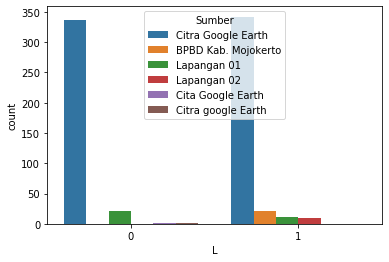

In [135]:
sns.countplot(x='L', data=Dataset, hue='Sumber')

## Part 04 - Preparing The Background Data

In [136]:
# Calling Shapefile using Geopandas as gpd

Background_Data = pd.read_excel(r'Background Data.xlsx')

In [137]:
Background_Data.head()

,X,Y,Aspect,DtD,DtR,Elevation,Geology,Land Use,PrC,Rainfall,Slope,SPI,TPI,TWI
0,671705.5938,9160312.5,0.41,1.0,1.0,0.0,0.0,0.17,0.74,0.0,0.29,0.0,0.28,0.50
1,671718.0938,9160312.5,0.86,1.0,1.0,0.0,0.0,0.17,0.74,0.0,0.05,0.0,0.28,0.23
2,671730.5938,9160312.5,0.86,1.0,1.0,0.0,0.0,0.17,0.74,0.0,0.05,0.0,0.28,0.23
3,671743.0938,9160312.5,0.41,1.0,1.0,0.0,0.0,0.17,1.00,0.0,0.05,0.0,0.28,0.23
4,671755.5938,9160312.5,0.95,1.0,1.0,0.0,0.0,0.17,0.74,0.0,0.05,0.0,0.28,0.50


In [138]:
BD = Background_Data[['TWI','TPI','SPI','Geology','Slope','Land Use','Rainfall','PrC','Elevation','DtR','DtD','Aspect']]
BD

,TWI,TPI,SPI,Geology,Slope,Land Use,Rainfall,PrC,Elevation,DtR,DtD,Aspect
0,0.50,0.28,0.00,0.00,0.29,0.17,0.0,0.74,0.00,1.00,1.00,0.41
1,0.23,0.28,0.00,0.00,0.05,0.17,0.0,0.74,0.00,1.00,1.00,0.86
2,0.23,0.28,0.00,0.00,0.05,0.17,0.0,0.74,0.00,1.00,1.00,0.86
3,0.23,0.28,0.00,0.00,0.05,0.17,0.0,1.00,0.00,1.00,1.00,0.41
4,0.50,0.28,0.00,0.00,0.05,0.17,0.0,0.74,0.00,1.00,1.00,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...
634624,1.00,0.62,1.00,0.24,0.55,0.85,1.0,1.00,0.23,0.09,0.43,1.00
634625,1.00,0.45,0.74,0.24,1.00,0.85,1.0,1.00,0.23,0.09,0.43,0.18
634626,1.00,0.45,0.74,0.24,1.00,0.85,1.0,0.74,0.23,0.09,0.43,1.00
634627,1.00,0.28,0.74,0.24,0.57,0.85,1.0,1.00,0.23,0.09,0.43,0.16


## Part 05 - Logistic Regression Analysist

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
logmodel = LogisticRegression()

In [141]:
a = logmodel.fit(X_train, y_train)
a

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
#Make Prediction
prediction = logmodel.predict(X_test)

In [143]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       114
           1       0.90      0.93      0.92       116

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



In [145]:
X_train

,TWI,TPI,SPI,Geology,Slope,Land Use,Rainfall,PrC,Elevation,DtR,DtD,Aspect
626,0.5,0.28,0.00,0.07,0.00,0.17,0.44,1.00,0.45,0.00,0.67,0.17
69,1.0,0.28,1.00,0.15,1.00,0.85,1.00,0.74,1.00,1.00,1.00,0.86
665,1.0,0.45,0.00,0.00,0.00,0.17,0.00,1.00,0.00,0.84,0.67,0.87
492,0.5,0.28,0.00,0.00,0.05,0.00,0.00,1.00,0.00,0.00,0.43,0.41
97,1.0,1.00,0.91,1.00,0.29,0.85,1.00,1.00,1.00,0.84,0.67,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.5,0.28,0.91,0.56,0.55,0.85,1.00,1.00,0.89,1.00,0.43,0.86
320,0.5,0.28,0.91,0.32,0.29,0.17,0.44,1.00,0.45,0.10,1.00,0.95
527,0.5,0.28,0.00,0.07,0.00,0.17,0.00,0.74,0.00,0.84,0.67,0.86
125,0.5,0.28,1.00,0.78,0.55,0.85,1.00,1.00,0.89,1.00,1.00,0.86


In [146]:
y_train

626    0
69     1
665    0
492    0
97     1
      ..
369    1
320    1
527    0
125    1
265    1
Name: L, Length: 536, dtype: int64

In [147]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(y_test, prediction)

array([[102,  12],
       [  8, 108]], dtype=int64)

In [148]:
true_positve_rate = 101/(101+7)
false_positve_rate = 1-(109/(109+13))

print('true positve rate =', true_positve_rate)
print('false positve rate =', false_positve_rate)

true positve rate = 0.9351851851851852
false positve rate = 0.10655737704918034


In [149]:
accuracy_score(y_test, prediction)

0.9130434782608695

In [150]:
import statsmodels.api as sm

In [151]:
X_train =sm.add_constant(X_train)
Logit = sm.Logit(y_train, X_train)
result = Logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.107147
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      L   No. Observations:                  536
Model:                          Logit   Df Residuals:                      523
Method:                           MLE   Df Model:                           12
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:                  0.8454
Time:                        07:29:40   Log-Likelihood:                -57.431
converged:                       True   LL-Null:                       -371.52
Covariance Type:            nonrobust   LLR p-value:                1.011e-126
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.6446      2.148     -5.888      0.000     -16.854      -8.435
TWI            0.6380      1

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Part 06 - Applying the Logistic Regression Model

In [152]:
## Apply Prediction Result Using sklearn
Landslide_Probability = pd.DataFrame(logmodel.predict_proba(BD))
Landslide_Probability

,0,1
0,0.962819,0.037181
1,0.975267,0.024733
2,0.975267,0.024733
3,0.982485,0.017515
4,0.976247,0.023753
...,...,...
634624,0.034902,0.965098
634625,0.024718,0.975282
634626,0.014212,0.985788
634627,0.089120,0.910880


In [153]:
Landslide_Probability.to_excel('Landslide_Probability.xlsx')
pd.read_excel(r'Landslide_Probability.xlsx')

,Unnamed: 0,0,1
0,0,0.962819,0.037181
1,1,0.975267,0.024733
2,2,0.975267,0.024733
3,3,0.982485,0.017515
4,4,0.976247,0.023753
...,...,...,...
634624,634624,0.034902,0.965098
634625,634625,0.024718,0.975282
634626,634626,0.014212,0.985788
634627,634627,0.089120,0.910880


## Part 07 - ROC Curve for Accuracy Measurement

In [154]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [155]:
logit_ROC_auc = roc_auc_score(y_test,prediction)
fpr, tpr, threshold = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])

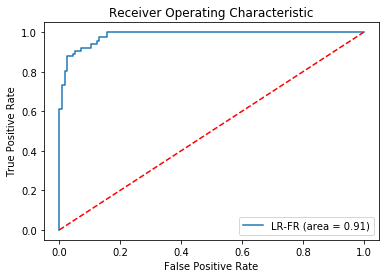

In [156]:
plt.figure()
plt.plot(fpr,tpr, label="LR-FR (area = %0.2f)" % logit_ROC_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel ('False Positive Rate')
plt.ylabel ("True Positive Rate")
plt.title ("Receiver Operating Characteristic")
plt.legend (loc='lower right',)
plt.show()

## Part 08 - Area Calculation of Each Susceptibility Class

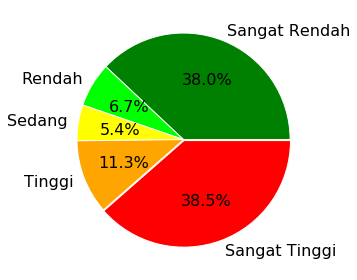

In [157]:
#Precentage of LR Susceptibility Map
x1 = 100*241196/634629
x2 = 100*42752/634629
x3 = 100*34519/634629
x4 = 100*71587/634629
x5 = 100*244575/634629
LSI = pd.DataFrame({'Landslide Susceptibility': ['Sangat Rendah','Rendah', 'Sedang', 'Tinggi',
                                       'Sangat Tinggi'],
                         'Percentage': [x1, x2, x3, x4, x5]},
                         index=[1, 2, 3, 4, 5])

#Layout
plt.pie(LSI['Percentage'], labels=LSI['Landslide Susceptibility'], textprops={'fontsize': 16}, 
    autopct='%0.1f%%', shadow=False, explode=[0,0,0,0,0.01], 
        wedgeprops={'edgecolor': 'white', "linewidth":1},
       colors =['green','lime','yellow','orange','red'])
plt.tight_layout()
plt.savefig('LR Susceptibility Area.png', format='png', dpi =1200)  

## Part 09 - Result of Landslide Susceptibility Class

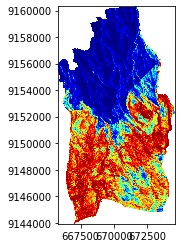

Text(0.5, 0.98, 'Landslides Susceptibility Class Using LR-FR in Pacet District')

In [203]:
rsLSM = rs.open(r'Landslides Susceptibility Class Using LR-FR in Pacet District.tif')
fig, ax = plt.subplots()
x1 = plot.show(rsLSM, cmap ='jet')
fig.suptitle('Landslides Susceptibility Class Using LR-FR in Pacet District')